In [1]:
import logging

from src.ts_stat import SeriesStat, ExtractStats
from src.load_datasets import load_power_consumption, load_household_electricity_data
from src.sanity import create_index, resample_data

from sktime.utils import plotting

In [2]:
logging.basicConfig(level=logging.INFO)

In [3]:
# dataframe = load_power_consumption()

dataframe = (
    load_power_consumption()
    .pipe(create_index, "DateTime")
    .pipe(resample_data, freq="H")
)

print(f"dataframe shape {dataframe.shape}")

print(dataframe.info())

dataframe.head()

format_datetime: DF Shape (52416, 8)
resample_Data: DF Shape (8736, 8)
dataframe shape (8736, 8)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2017-01-01 00:00:00 to 2017-12-30 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                8736 non-null   float64
 1   Humidity                   8736 non-null   float64
 2   Wind Speed                 8736 non-null   float64
 3   general diffuse flows      8736 non-null   float64
 4   diffuse flows              8736 non-null   float64
 5   Zone 1 Power Consumption   8736 non-null   float64
 6   Zone 2  Power Consumption  8736 non-null   float64
 7   Zone 3  Power Consumption  8736 non-null   float64
dtypes: float64(8)
memory usage: 614.2 KB
None


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Index,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Zone 3  Power Consumption'>)

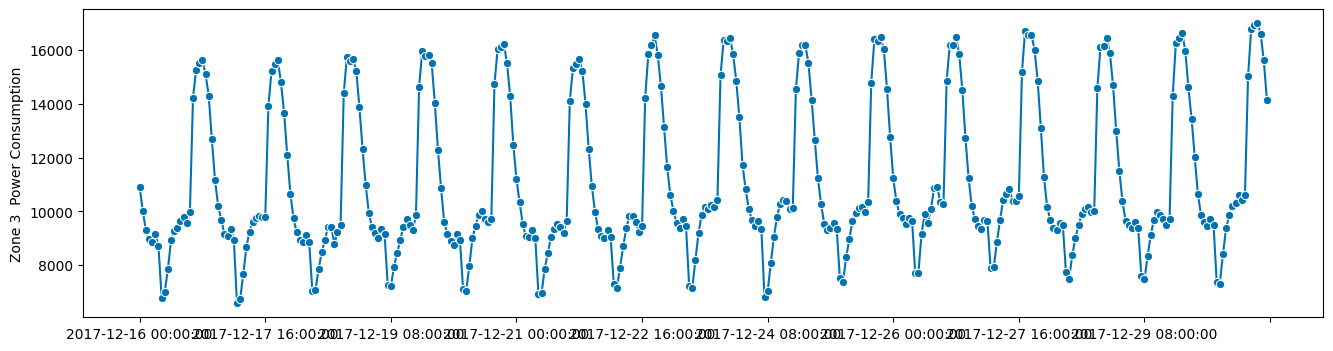

In [4]:
target_col = "Zone 3  Power Consumption"

target_data = dataframe[target_col].tail(3000)

plotting.plot_series(target_data.tail(360))

In [5]:
%%time

ex_stat = ExtractStats(frequency="H")

stat = ex_stat.extract_statistics(target_data)

INFO:src.ts_stat:detecting strickly positive data...
INFO:src.ts_stat:detecting strickly positive data True
INFO:src.ts_stat:detecting seasonality degree ...
INFO:src.ts_stat:detecting seasonality periods...
INFO:src.ts_stat:Differencing: 1
INFO:src.ts_stat:Lags used for seasonal detection: 1499
INFO:src.ts_stat:Detected Significant SP: [24, 48, 72] ... [625, 1151, 1200]
INFO:src.ts_stat:Detected Primary SP: 24
INFO:src.ts_stat:is_seasonal       True
INFO:src.ts_stat:primary_sp_2_use  24
INFO:src.ts_stat:candidate_sps     [24, 48, 23, 25, 47, 49, 2, 22, 26, 46, 8]
INFO:src.ts_stat:ignificant_sps    [24, 48, 23, 25, 47, 49, 2, 22, 26, 46, 8]
INFO:src.ts_stat:all_sps_to_use    [24]
INFO:src.ts_stat:detecting seasonality Type ...
INFO:src.ts_stat: seasonality Type {seasonality_type}
INFO:src.ts_stat:detecting lowercase_d ...
INFO:src.ts_stat:lowercase_d ...1
INFO:src.ts_stat:detecting upper_d ...
INFO:src.ts_stat:uppercase_d ...0


CPU times: total: 0 ns
Wall time: 37.8 ms


In [6]:
stat

SeriesStat[
	frequency = 'H'
	is_strickly_positive = True
	is_white_noise = False
	is_seasonal = True
	seasonality_type = 'Multiplicative'
	primary_seasonality = 24
	candidate_sps = [24, 48, 23, 25, 47, 49, 2, 22, 26, 46, 8]
	significant_sps = [24, 48, 23, 25, 47, 49, 2, 22, 26, 46, 8]
	all_sps_to_use = [24]
	lower_d = 1
	uppercase_d = 0 
]

In [9]:
dd = stat.to_dict()

In [8]:
stat.to_dataframe()

,0
frequency,H
is_strickly_positive,True
is_white_noise,False
is_seasonal,True
seasonality_type,Multiplicative
primary_seasonality,24
candidate_sps,"[24, 48, 23, 25, 47, 49, 2, 22, 26, 46, 8]"
significant_sps,"[24, 48, 23, 25, 47, 49, 2, 22, 26, 46, 8]"
all_sps_to_use,[24]
lower_d,1


In [12]:
import pandas as pd

pd.DataFrame.from_dict(
    dd,
    orient="index",
    columns=["Values"],
)

,Values
frequency,H
is_strickly_positive,True
is_white_noise,False
is_seasonal,True
seasonality_type,Multiplicative
primary_seasonality,24
candidate_sps,"[24, 48, 23, 25, 47, 49, 2, 22, 26, 46, 8]"
significant_sps,"[24, 48, 23, 25, 47, 49, 2, 22, 26, 46, 8]"
all_sps_to_use,[24]
lower_d,1
